# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [59]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
#city_df=pd.DataFrame({"City":cities})
#city_df.head()

,City
0,avarua
1,bluff
2,guerrero negro
3,ushuaia
4,severo-yeniseyskiy


In [68]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key


city_list=[]
city_name=[]
country=[]
lng=[]
lat=[]
temp=[]
humid=[]
clouds=[]
wind=[]
date=[]


for city in cities:
    query_url=f"{url}&q={city}"
    response_json=requests.get(query_url).json()
 
    try:
        city_id=response_json['id']
        city_list.append(city_id)
        cityname=response_json['name']
        city_name.append(cityname)
        countryname = response_json['sys']['country']
        country.append(countryname)
        lng_list = response_json['coord']['lon']
        lng.append(lng_list)
        lat_list = response_json['coord']['lat']
        lat.append(lat_list)
        temps = response_json['main']['temp']
        temp.append(temps)
        humidity = response_json['main']['humidity']
        humid.append(humidity)
        clouds_list = response_json['clouds']['all']
        clouds.append(clouds_list)
        wind_speed = response_json['wind']['speed']
        wind.append(wind_speed)
        date_info=response_json['dt']
        date.append(date_info)

        print(f"City Name: {city}, City ID: {city_id}")
    except:
        print("Missing field/skipping")


ty ID: 1629965
City Name: albany, City ID: 5106841
City Name: rikitea, City ID: 4030556
City Name: rio gallegos, City ID: 3838859
City Name: puerto ayora, City ID: 3652764
City Name: hermanus, City ID: 3366880
City Name: tuktoyaktuk, City ID: 6170031
Missing field/skipping
City Name: darab, City ID: 137956
Missing field/skipping
City Name: saint george, City ID: 5546220
Missing field/skipping
City Name: hithadhoo, City ID: 1282256
Missing field/skipping
City Name: glendive, City ID: 5654391
City Name: kragero, City ID: 3149412
City Name: aden, City ID: 415189
City Name: cape town, City ID: 3369157
City Name: itarema, City ID: 3393692
City Name: aswan, City ID: 359792
City Name: bluff, City ID: 2206939
City Name: port hardy, City ID: 6111862
City Name: jijiga, City ID: 333795
City Name: alofi, City ID: 4036284
City Name: ribeira grande, City ID: 3372707
City Name: torbay, City ID: 6167817
City Name: arraial do cabo, City ID: 3471451
City Name: katsuura, City ID: 2112309
City Name: west 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [95]:
cities_df=pd.DataFrame({"City":city_name,"Lat":lat,"Lng":lng, "Max Temp":temp,"Humidity":humid,"Clouds":clouds,"Wind Speed":wind,"Country":country, "Date":date})
cities_df.head()
cities_df.to_csv(r'cities_updated.csv', index=False,header=True)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [79]:
humid_max=cities_df["Humidity"].max()
print(humid_max)

100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

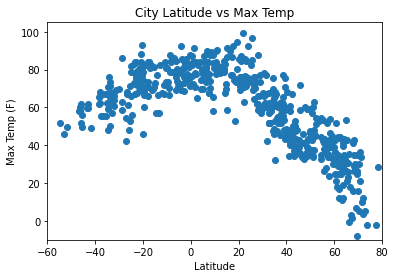

<Figure size 432x288 with 0 Axes>

In [91]:
x_values=cities_df["Lat"]
y_values=cities_df["Max Temp"]

plt.scatter(x_values,y_values)
plt.title("City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.ylim(-10, 105)
plt.xlim(-60,80)
plt.show()
plt.savefig("Latitude vs Temp Plot.png")

In [ ]:
#Scatter plot is looking at relationship between latitude and #temperature. The equator is at 0 latitude, so as you approach it the #temperature increases.

## Latitude vs. Humidity Plot

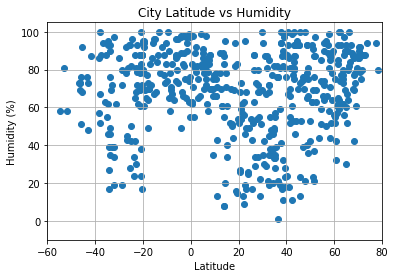

<Figure size 432x288 with 0 Axes>

In [93]:
x_values=cities_df["Lat"]
y_values=cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-10, 105)
plt.xlim(-60,80)
plt.grid(True)
plt.show()
plt.savefig("Latitude vs Humidity Plot.png")

In [ ]:
# The scatter plot is looking at the relationship between latitude and #humidity. There doesn't seem to be a clear coorelation between the two.

## Latitude vs. Cloudiness Plot

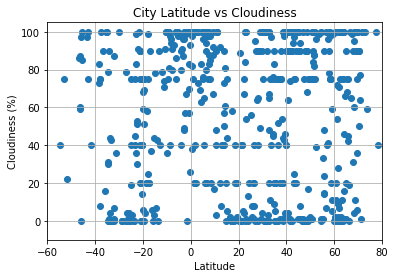

<Figure size 432x288 with 0 Axes>

In [96]:
x_values=cities_df["Lat"]
y_values=cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-10, 105)
plt.xlim(-60,80)
plt.grid(True)
plt.show()
plt.savefig("Latitude vs Cloudiness Plot.png")

In [ ]:
# The scatter plot is looking at the relationship between latitude and #cloudiness. There doesn't seem to be a clear coorelation between the two.

## Latitude vs. Wind Speed Plot

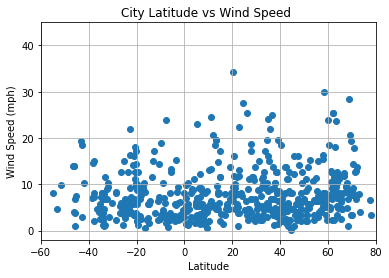

<Figure size 432x288 with 0 Axes>

In [103]:
x_values=cities_df["Lat"]
y_values=cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title("City Latitude vs Wind Speed ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2, 45)
plt.xlim(-60,80)
plt.grid(True)
plt.show()
plt.savefig("Latitude vs Wind Speed Plot.png")

In [ ]:
# The scatter plot is looking at the relationship between latitude and #wind speed. There doesn't seem to be a clear coorelation between the two.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


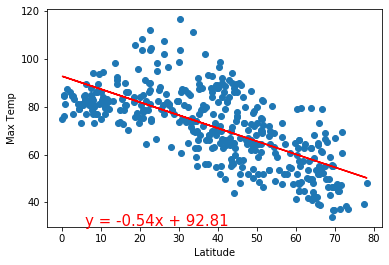

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


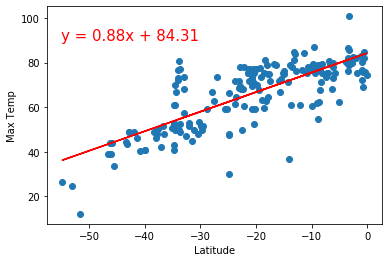

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


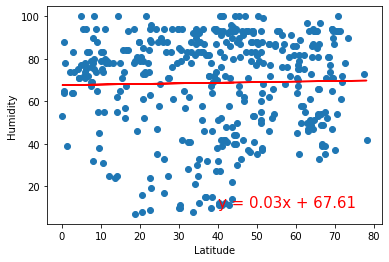

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


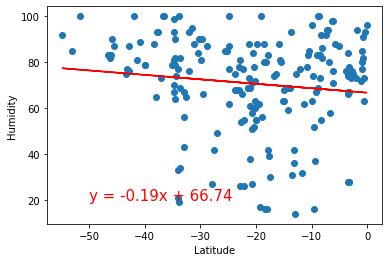

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


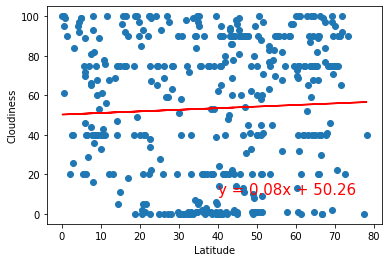

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


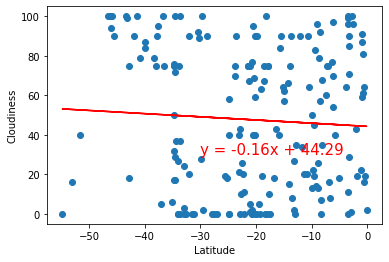

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


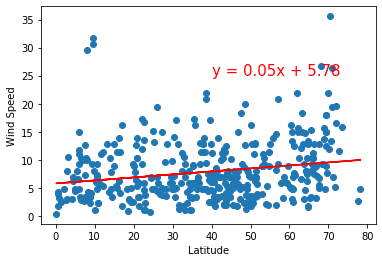

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


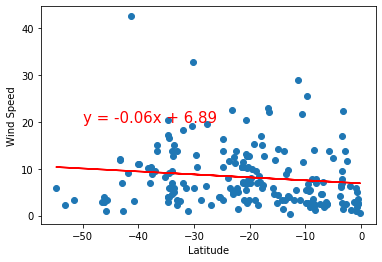